# Eco Benchmark result data vizualization

## Data importation and preparation


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [49]:
data_filename='20220627-120000.csv'

In [33]:
df = pd.read_csv ('results/'+data_filename)

In [34]:
df["testcase"] = df["service"] + '-' + df["use_case"]

In [35]:
df["ram"] = df["application_ram_avg"] + df["database_ram_avg"]

In [36]:
df["cpu"] = df["application_cpu_avg"] + df["application_cpu_avg"]

In [37]:
df["wh_by_iteration"] = (((df["application_energy"] + df["database_energy"])/df["iterations"])/1000000)/3600 

In [38]:
df.head()

,service,use_case,run_id,valid,vus,iterations,http_reqs,checks_passes,checks_fails,application_ram_avg,...,application_energy,database_ram_avg,database_ram_median,database_cpu_avg,database_cpu_median,database_energy,testcase,ram,cpu,wh_by_iteration
0,go-pgx,aggregation-code-side,1656147109,True,20,503,348511,348511,0,1.449924e+08,...,1.878773e+11,3.377482e+08,369537024.0,0.140525,0.166764,3.879691e+10,go-pgx-aggregation-code-side,4.827406e+08,1.719226,0.125179
1,go-pgx,aggregation-code-side,1656147939,True,20,504,348156,348156,0,1.391549e+08,...,1.886653e+11,3.379178e+08,370954240.0,0.144225,0.170236,3.960074e+10,go-pgx-aggregation-code-side,4.770727e+08,1.703719,0.125808
2,go-pgx,aggregation-code-side,1656148762,True,20,508,347566,347566,0,1.377669e+08,...,1.869462e+11,3.374540e+08,370905088.0,0.142496,0.168407,3.947159e+10,go-pgx-aggregation-code-side,4.752209e+08,1.716637,0.123807
3,go-pgx,aggregation-code-side,1656149586,True,20,504,348469,348469,0,1.416682e+08,...,1.876511e+11,3.390575e+08,371628032.0,0.143651,0.168731,3.966546e+10,go-pgx-aggregation-code-side,4.807257e+08,1.725342,0.125285
4,go-pgx,aggregation-code-side,1656150410,True,20,504,348404,348404,0,1.463247e+08,...,1.880509e+11,3.368430e+08,369997824.0,0.139595,0.167274,4.018137e+10,go-pgx-aggregation-code-side,4.831677e+08,1.706895,0.125789


In [39]:
df.count()

service                   250
use_case                  250
run_id                    250
valid                     250
vus                       250
iterations                250
http_reqs                 250
checks_passes             250
checks_fails              250
application_ram_avg       250
application_ram_median    250
application_cpu_avg       250
application_cpu_median    250
application_energy        250
database_ram_avg          250
database_ram_median       250
database_cpu_avg          250
database_cpu_median       250
database_energy           250
testcase                  250
ram                       250
cpu                       250
wh_by_iteration           250
dtype: int64

## Energy consumption

The lower the better.

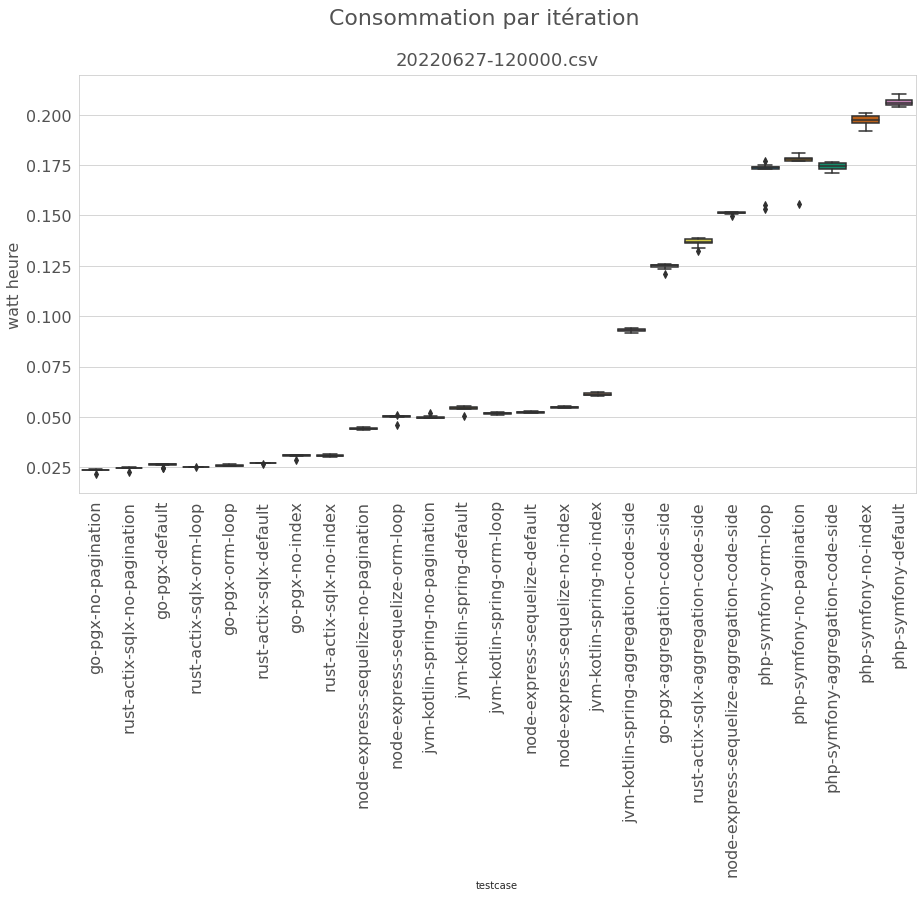

In [40]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(1,1,figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'wh_by_iteration',palette='colorblind',fliersize=5, data = df.sort_values(['wh_by_iteration'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('watt heure', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Consommation par itération'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)


filename = 'boxplot-wh-filtered'
plt.savefig(filename+'.png', facecolor=facecolor)

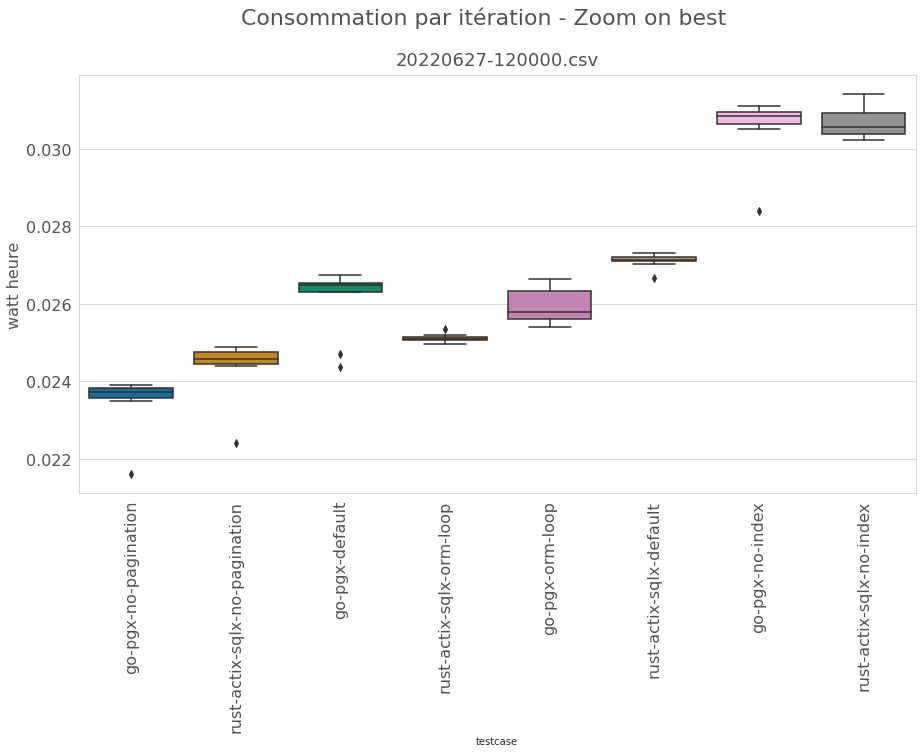

In [50]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'wh_by_iteration',palette='colorblind',fliersize=5, data = df[df['wh_by_iteration']<0.035].sort_values(['wh_by_iteration'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('watt heure', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Consommation par itération - Zoom on best'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'boxplot-zoom-best'
plt.savefig(filename+'.png', facecolor=facecolor)

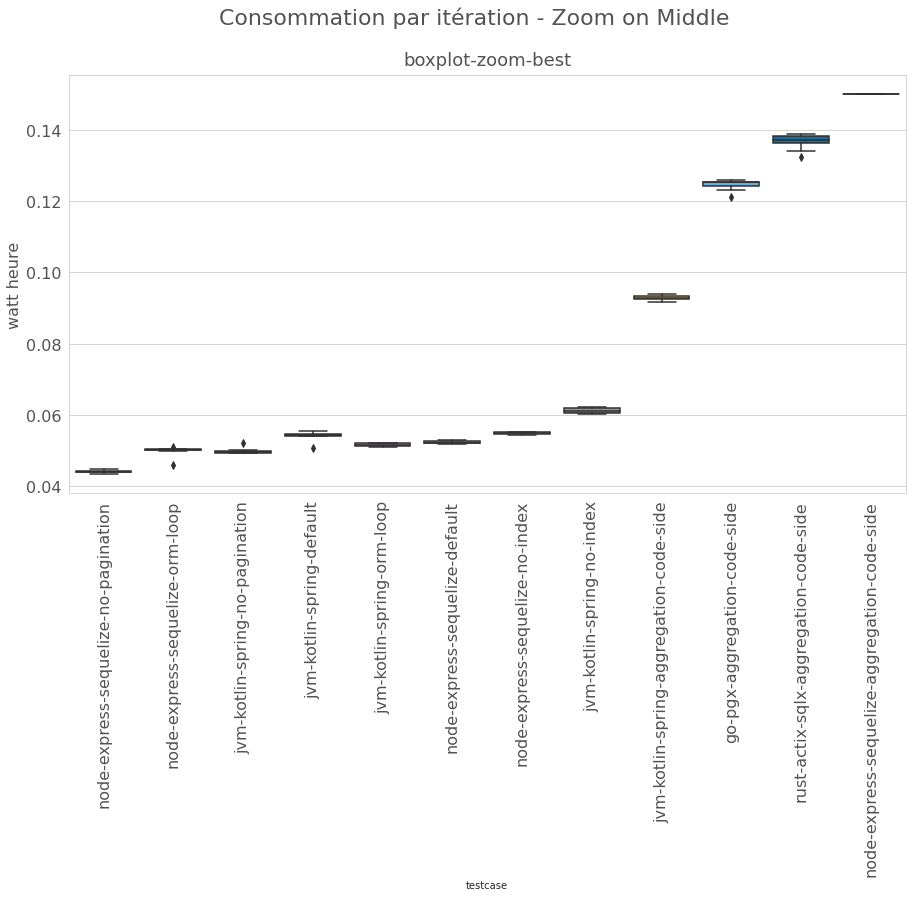

In [48]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'wh_by_iteration',palette='colorblind',fliersize=5, data = df[(df['wh_by_iteration']>0.035) & (df['wh_by_iteration']<0.150)].sort_values(['wh_by_iteration'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('watt heure', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Consommation par itération - Zoom on Middle'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'boxplot-zoom-best'
plt.savefig(filename+'.png', facecolor=facecolor)

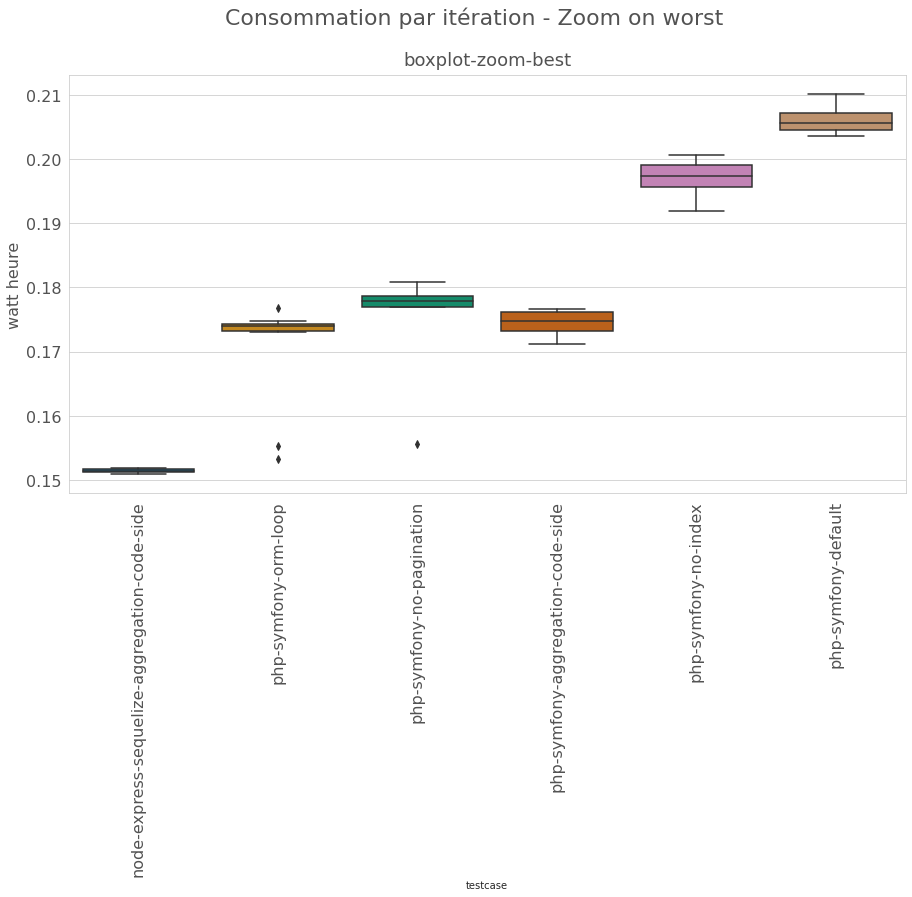

In [43]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(15, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'wh_by_iteration',palette='colorblind',fliersize=5, data = df[df['wh_by_iteration']>0.150].sort_values(['wh_by_iteration'], ascending=[1]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('watt heure', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Consommation par itération - Zoom on worst'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'boxplot-zoom-worst'
plt.savefig(filename+'.png', facecolor=facecolor)

## Performance

The higher the better.

The lower you need more servers to serve the same amount of users.

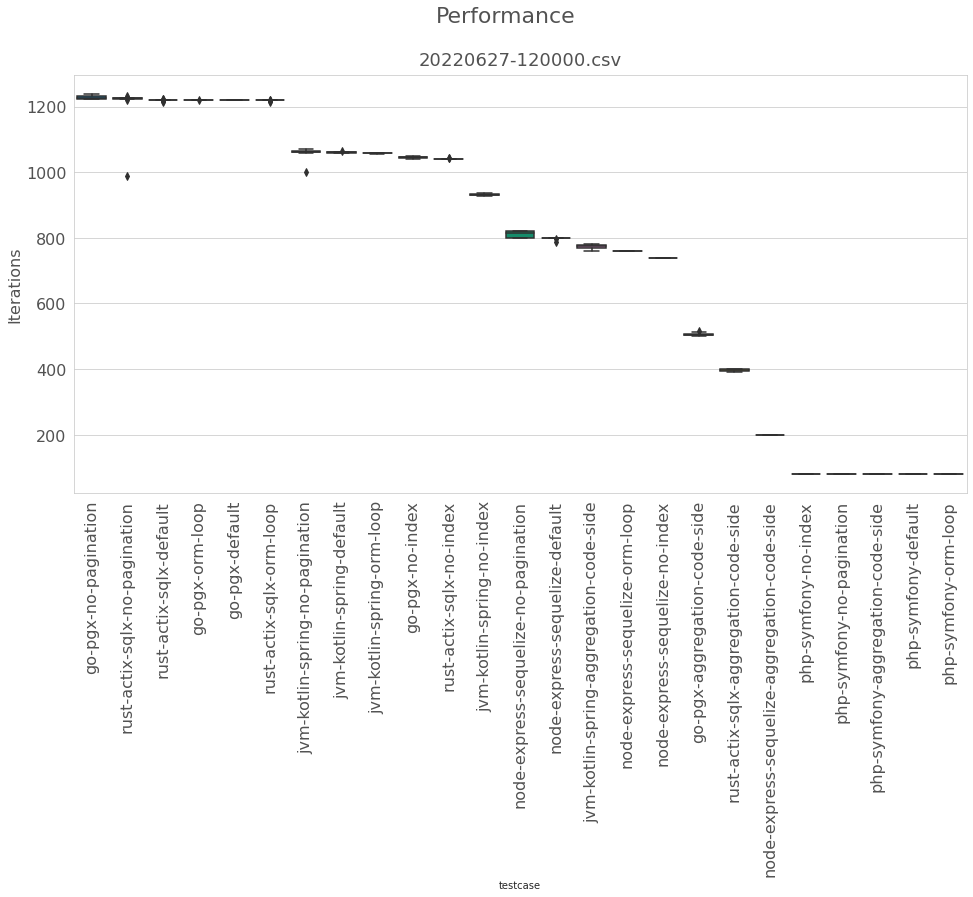

In [51]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'iterations',palette='colorblind',fliersize=5, data = df.sort_values(['iterations'], ascending=[0]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('Iterations', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Performance'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'boxplot-performance'
plt.savefig(filename+'.png', facecolor=facecolor)

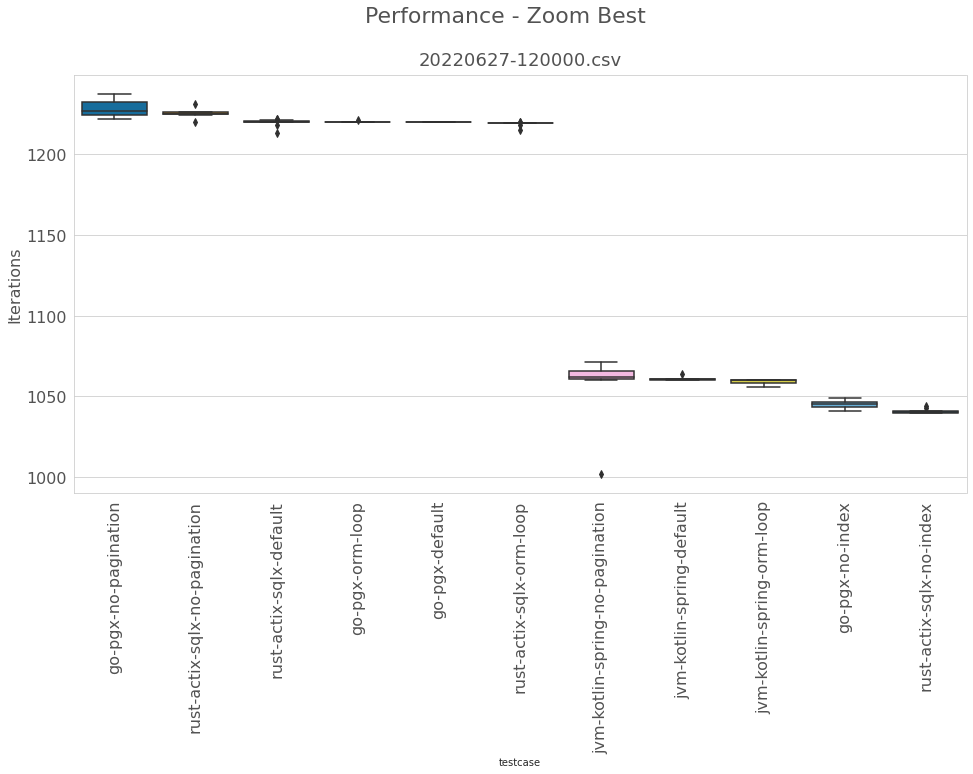

In [52]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'iterations',palette='colorblind',fliersize=5, data = df[df['iterations']>1000].sort_values(['iterations'], ascending=[0]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('Iterations', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Performance - Zoom Best'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'boxplot-performance-zoom-best'
plt.savefig(filename+'.png', facecolor=facecolor)

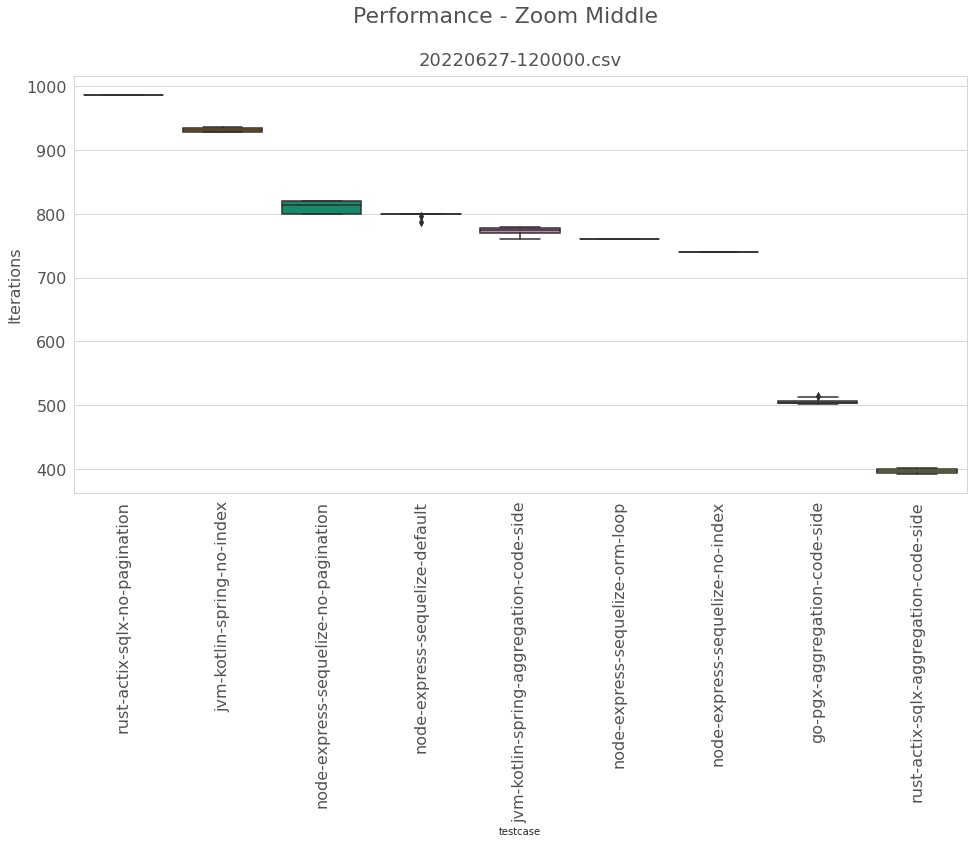

In [53]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'iterations',palette='colorblind',fliersize=5, data = df[(df['iterations']<1000) & (df['iterations']>200)].sort_values(['iterations'], ascending=[0]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('Iterations', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Performance - Zoom Middle'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'boxplot-performance-zoom-best'
plt.savefig(filename+'.png', facecolor=facecolor)

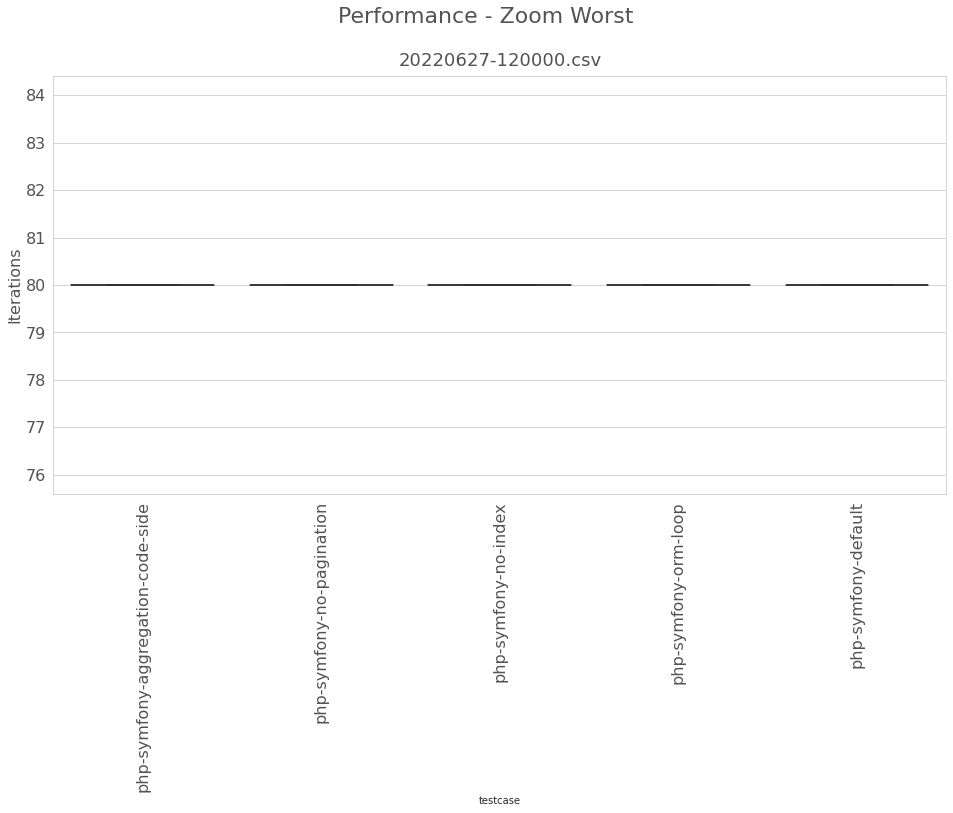

In [54]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'iterations',palette='colorblind',fliersize=5, data = df[df['iterations']<200].sort_values(['iterations'], ascending=[0]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('Iterations', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'Performance - Zoom Worst'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'boxplot-performance-zoom-worst'
plt.savefig(filename+'.png', facecolor=facecolor)

## Server resource usage

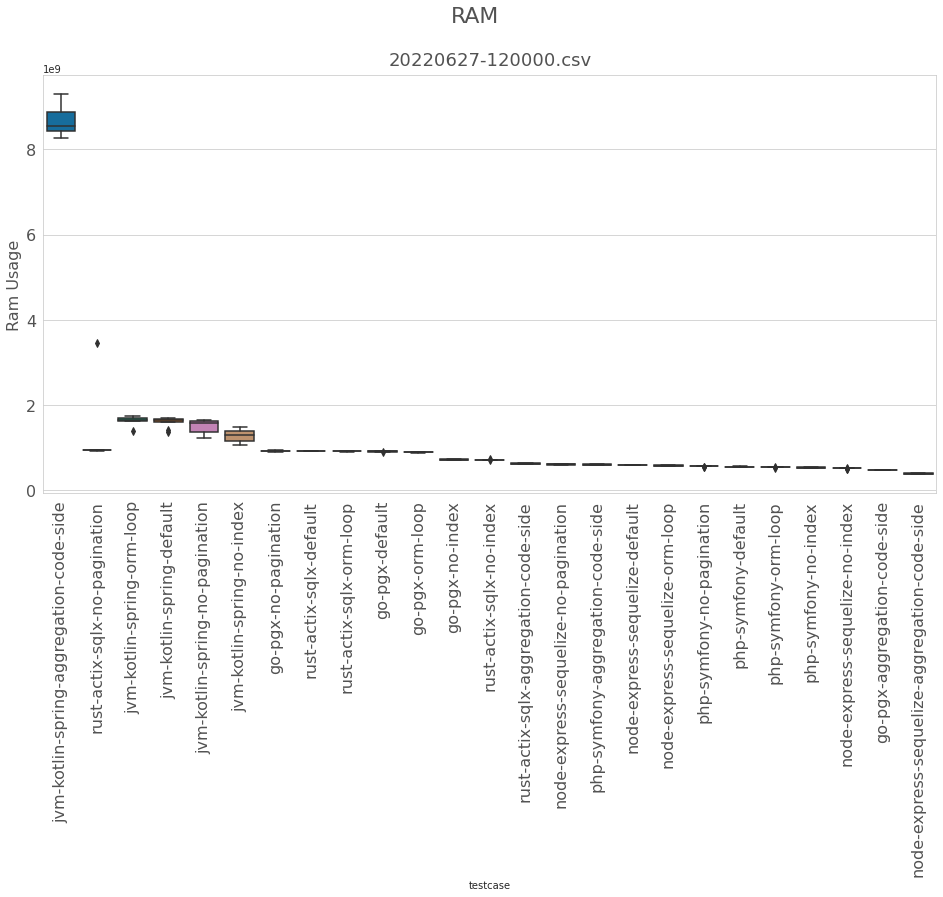

In [55]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(16, 8), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'ram',palette='colorblind',fliersize=5, data = df.sort_values(['ram'], ascending=[0]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('Ram Usage', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'RAM'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'sns-boxplot'
plt.savefig(filename+'.png', facecolor=facecolor)

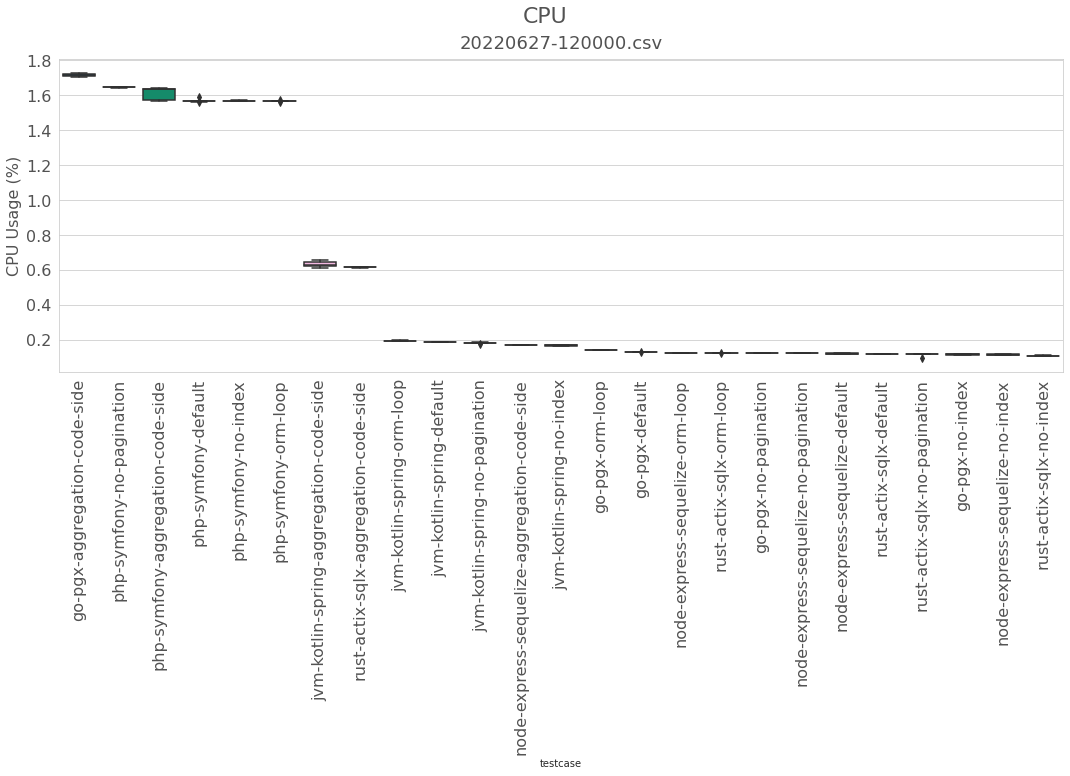

In [56]:
sns.set_style("whitegrid")
facecolor = '#FFFFFF'
fig, ax = plt.subplots(figsize=(18, 6), facecolor=facecolor)
sns.boxplot(x = 'testcase', y = 'cpu',palette='colorblind',fliersize=5, data = df.sort_values(['cpu'], ascending=[0]))
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'DejaVu Sans'} 
ax.set_ylabel('CPU Usage (%)', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
title = 'CPU'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = data_filename
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)
for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
lines = ax.get_lines()
plt.xticks(rotation=90)
filename = 'sns-boxplot'
plt.savefig(filename+'.png', facecolor=facecolor)